In [20]:
# conventional way to import pandas
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
import pylab as pl
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# DF TO EXCEL
from pandas import ExcelWriter
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from pandas import ExcelWriter

In [21]:
# read CSV file from the 'data' subdirectory using a relative path
Dataset= pd.read_csv('C:\\Users\\Admin\\Desktop\\CS3123\\Data_Set\\Dataset.csv')

# display the first 5 rows
Dataset.head()

,0,0.1,1,2,3,4,5,6,7,8,...,436,437,438,439,440,441,442,443,444,445
0,1.204940e+12,1,79,1.0,4597,73.0,164.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,40.0,-1.0,-1.0,-1.0
1,1.407940e+12,2,76,0.0,4595,74.0,172.0,NaN,1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,55.0,-1.0,-1.0,-1.0
2,2.112950e+12,3,72,1.0,4602,NaN,NaN,NaN,1,1,...,-1.0,-1.0,-1.0,NaN,NaN,1.0,72.0,-1.0,-1.0,-1.0
3,4.129550e+11,4,63,1.0,4600,75.0,168.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,55.0,-1.0,-1.0,-1.0
4,2.307940e+12,5,80,0.0,4679,85.0,187.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,NaN,NaN,1.0,27.0,-1.0,-1.0,-1.0


In [22]:
# Drop index and unnessery featuer 
Dataset.drop(['0', '0.1','3','1'], axis=1,inplace=True)

In [23]:
#Drop all features except (Age - gender -Height -weight)
subset=Dataset.drop(Dataset.columns.to_series()["6":"445"], axis=1)

In [24]:
subset.shape

(2772, 3)

In [25]:
#Missing da


In [26]:
import numpy as np

# Drop sample that has missing value in Gender feater 
WH_Data=subset.drop(subset.index[1319])

WH_Data.shape

(2771, 3)

In [27]:
#Removing outliers from Hight
WH_Data = WH_Data[(WH_Data['5']> 145)]
WH_Data = WH_Data[(WH_Data['5']<195)]

In [28]:
#Removing outliers from Weight
WH_Data = WH_Data[(WH_Data['4']> 38)]
WH_Data = WH_Data[(WH_Data['4']<250)]

In [29]:
WH_Data.shape

(2291, 3)

# Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

In [30]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

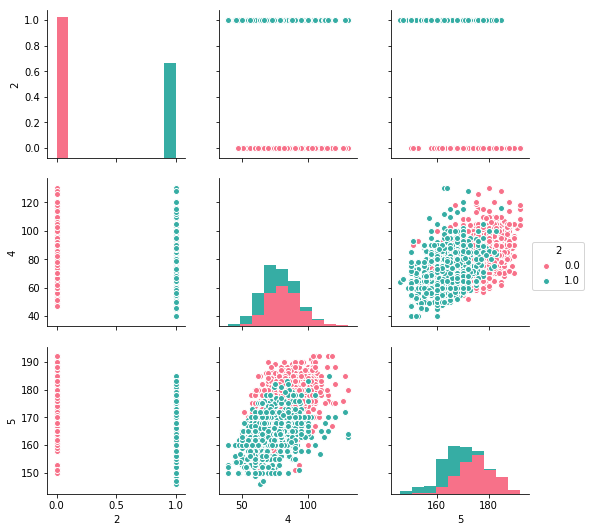

In [31]:
sns.pairplot(WH_Data,  hue="2",palette="husl")

In [32]:
# Female subset
F_Data=WH_Data[WH_Data['2'] == 0.0]
#Male subset
M_Data=WH_Data[WH_Data['2'] == 1.0]

In [33]:
BF_Data=F_Data.sample(943, random_state=0)

In [34]:
frames = [M_Data, BF_Data]

In [35]:
MF_Data = pd.concat(frames)

In [38]:
MF_Data.shape

(1865, 3)

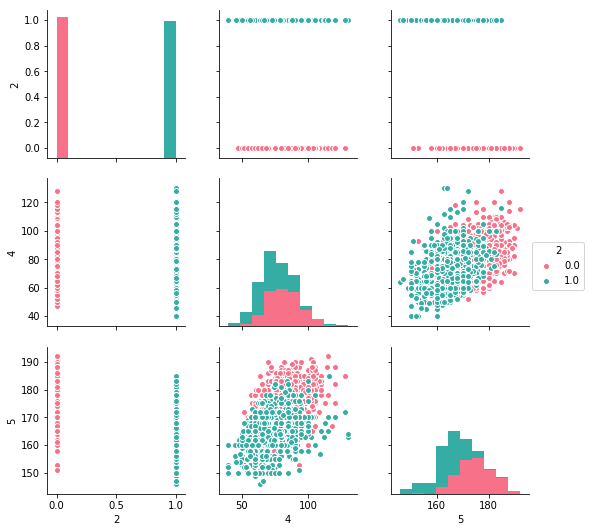

In [39]:

sns.pairplot(MF_Data,  hue="2",palette="husl")

In [40]:
MF_Data=MF_Data.sample(1864, random_state=0)


# Task 7: Cross Validation CV

In [41]:
# select a Series from the DataFrame
y = MF_Data['2']
TT=MF_Data.drop(['2'],axis=1)
X=TT[:]
# print the first 5 values
y.shape


(1864,)

In [42]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1864,)


# KNN ML Algorithm With Accuracy 79%

In [43]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
#(scores)

In [44]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of K-NN classifier on test set:',scores.mean())


Accuracy of K-NN classifier on test set: 0.783763612139808


In [45]:
# search for an optimal value of K for KNN
k_range = list(range(1, 50))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)


[0.7236717879265014, 0.7172718341719916, 0.7596330395888311, 0.7591211888761246, 0.783763612139808, 0.7832460724977581, 0.7816302024647135, 0.7784187712646674, 0.7859427779347841, 0.7837922097147338, 0.784318374507724, 0.7805807479290462, 0.7955858190284286, 0.7864746622427595, 0.7886223248268547, 0.7827426634221417, 0.7880846904182526, 0.7875670590192775, 0.7923943296667265, 0.7924028630607418, 0.7950652819934987, 0.7956029164021008, 0.7950652819934987, 0.7945276475848966, 0.7950653125791404, 0.7977277009262556, 0.7950653125791404, 0.7945362727358367, 0.7950681876294536, 0.7913190302638807, 0.792926213974702, 0.7934666622623342, 0.7961548648909866, 0.7956201055326979, 0.7907871459559053, 0.7950825017097374, 0.7907813958552785, 0.7913133107488955, 0.7896946574224624, 0.7929176194094035, 0.7934495343030206, 0.7966753407546334, 0.7902380725173329, 0.793461034504274, 0.791848100692826, 0.7939786353176074, 0.7896947185937455, 0.7955915385434138, 0.7934380952730502]


Text(0,0.5,'Cross-Validated Accuracy')

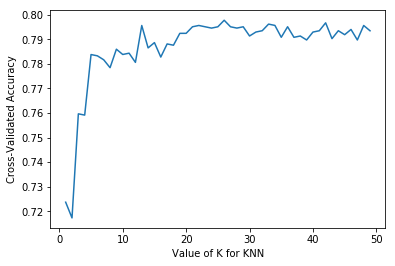

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [47]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=24)
y_pred_K = cross_val_predict(knn, X, y, cv=10)
conf_mat_KNN = confusion_matrix(y, y_pred_K)
print('Accuracy of KNN classifier on test set:',cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())


Accuracy of KNN classifier on test set: 0.7945276475848966


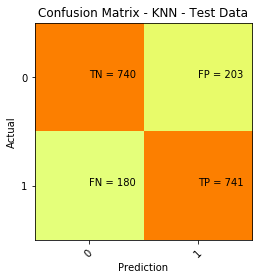

In [48]:
plt.clf()
plt.imshow(conf_mat_KNN, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - KNN - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_KNN[i][j]))
plt.show()

In [49]:
print(classification_report(y, y_pred_K))

             precision    recall  f1-score   support

        0.0       0.80      0.78      0.79       943
        1.0       0.78      0.80      0.79       921

avg / total       0.79      0.79      0.79      1864



#  Decision Tree with Accuracy 67%

In [50]:
#10-fold cross-validation with Decision Tree
DT = DecisionTreeClassifier()
scores = cross_val_score(DT, X, y, cv=10, scoring='accuracy')
y_pred_DT = cross_val_predict(DT, X, y, cv=10)
conf_mat_DT = confusion_matrix(y, y_pred_DT)
#print(scores)

In [51]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of Decision Tree classifier on test set:',scores.mean())

Accuracy of Decision Tree classifier on test set: 0.7472990737444289


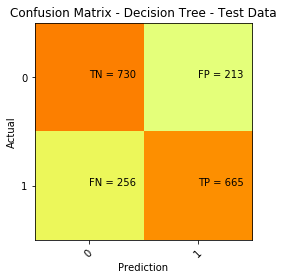

In [52]:
plt.clf()
plt.imshow(conf_mat_DT, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - Decision Tree - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_DT[i][j]))
plt.show()

In [53]:
print(classification_report(y, y_pred_DT))

             precision    recall  f1-score   support

        0.0       0.74      0.77      0.76       943
        1.0       0.76      0.72      0.74       921

avg / total       0.75      0.75      0.75      1864



#  Logistic Regrassion with Accuracy 73%

In [54]:
# 10-fold cross-validation with logistic regression
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
y_pred_LR= cross_val_predict(logreg, X, y, cv=10)
conf_mat_LR= confusion_matrix(y, y_pred_LR)
#print(scores)


In [55]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of logistic regression classifier on test set:',scores.mean())

Accuracy of logistic regression classifier on test set: 0.7623211504605585


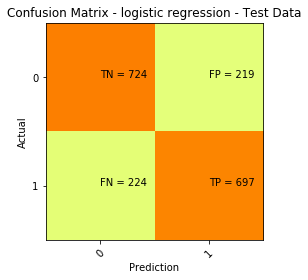

In [56]:
plt.clf()
plt.imshow(conf_mat_LR, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - logistic regression - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_LR[i][j]))
plt.show()

In [57]:
print(classification_report(y, y_pred_LR))

             precision    recall  f1-score   support

        0.0       0.76      0.77      0.77       943
        1.0       0.76      0.76      0.76       921

avg / total       0.76      0.76      0.76      1864



In [58]:
from sklearn.svm import SVC  
SVM= SVC(kernel='linear') 
scoresM = cross_val_score(SVM, X, y, cv=10, scoring='accuracy')
y_pred_SVM= cross_val_predict(SVM, X, y, cv=10)
conf_mat_SVM= confusion_matrix(y, y_pred_SVM)
#print(scores)
print('Accuracy of LDA classifier on test set:',scoresM.mean())

Accuracy of LDA classifier on test set: 0.7929175582381202


#  Linear Discriminant Analysis with Accuracy 74%

In [59]:
#10-fold cross-validation with Discriminant Analysis
lda = LinearDiscriminantAnalysis()
scores = cross_val_score(lda, X, y, cv=10, scoring='accuracy')
y_pred_LDA= cross_val_predict(lda, X, y, cv=10)
conf_mat_LDA= confusion_matrix(y, y_pred_LDA)
#print(scores)

In [60]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of LDA classifier on test set:',scores.mean())

Accuracy of LDA classifier on test set: 0.8068702691658807


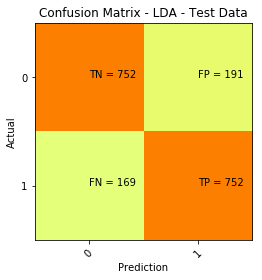

In [61]:
plt.clf()
plt.imshow(conf_mat_LDA, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - LDA - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_LDA[i][j]))
plt.show()

In [62]:
print(classification_report(y, y_pred_LDA))

             precision    recall  f1-score   support

        0.0       0.82      0.80      0.81       943
        1.0       0.80      0.82      0.81       921

avg / total       0.81      0.81      0.81      1864



In [63]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
scores = cross_val_score(NN, X, y, cv=10, scoring='accuracy')
y_pred_NN= cross_val_predict(NN, X, y, cv=10)
conf_mat_SVM= confusion_matrix(y, y_pred_NN)
#print(scores)
print('Accuracy of NN classifier on test set:',scores.mean())

Accuracy of NN classifier on test set: 0.5058996338286985


In [64]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
y_pred_clf= cross_val_predict(clf, X, y, cv=10)
conf_mat_clf= confusion_matrix(y, y_pred_clf)
#print(scores)
print('Accuracy of NN classifier on test set:',scores.mean())

Accuracy of NN classifier on test set: 0.7972186946782206
